# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Jordan Wheeler
https://github.com/jordanwheeler7/CSIS-44620-Final-Project

This project is about the 2022 Department of Defense Recruiting. The article speaks on the inability of all branches to meet goals. We will analyze the text and sentiment of the article to see how it reads. We then will use spacy and its functions to determine frequent words and lemmas. We then will summarize the article and see if theres a difference in the polarity from the original article.

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [132]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).


from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest
from nltk.tokenize import sent_tokenize
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


!pip list

print('All prereqs installed.')

Package                       VersionAll prereqs installed.

----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.5.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfil

## 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [147]:
# Gather Webpage Information

url  = ('https://www.nbcnews.com/news/military/every-branch-us-military-struggling-meet-2022-recruiting-goals-officia-rcna35078')
response = requests.get(url)

# URL Success Loop

if response.status_code == 200:
    text = response.text
    soup = BeautifulSoup(text, 'html.parser')
    article = soup.find('article')
    
# Dump to .pkl file
    with open('recruiting_goal.pkl', 'wb') as file:
        pickle.dump(str(article), file)
    print("Information gathered and saved to 'recruiting_goal.pkl' successfully.")
else:
    print('Failed to retrieve the webpage. Status code:', response.status_code)

Information gathered and saved to 'recruiting_goal.pkl' successfully.


## 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [134]:
from spacy.tokens import Doc, Token

# Reading in HTML File Content

with open('recruiting_goal.pkl', 'rb') as file:
    article_text = pickle.load(file)
    
# Parse HTML Content
    soup = BeautifulSoup(article_text, 'html.parser')
    text = soup.get_text()
    
# Strip Blank Lines
text_formatted = "\n".join(line for line in text.split("\n") if line.strip())

# Load spaCy Model
nlp = spacy.load('en_core_web_sm')

# Load spaCy Pipe
nlp.add_pipe('spacytextblob')

# Add Document
doc = nlp(text_formatted)

# Sentiment Analysis
polarity = doc._.blob.polarity

print('Polarity Score:', polarity)

# Gather Sentence Count
print('''
sentences\t{num_sent}
'''.format(num_sent = len(list(doc.sents)),
          )) 


Polarity Score: 0.04480423725794096

sentences	68



The polarity score is a scale from -1 to 1 with -1 being completely negative and 1 being completly positive. The score we are given means that the article is written with a slightly positive tone. I do not understand where the positive tone for the article comes. It is written talking about the issues we are having and how the state of our Armed Forces is in a dangerously low level. It also talks about how we are having to do extra actions to try and get our volunteer force back to a sustainable level. For a media article, I feel that they should be written with as much neutrality as possible. That being said, this article is close to a neutral tone and therefore I believe that it could be a credible source of information.

## 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [135]:
# Article text is loaded into the trained model from the previous code box. We start by defining our function

def frequent_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get common tokens and in lower case
common_tokens = [token.text.lower() for token in doc if frequent_tokens(token)]

# Gather Token Counts
token_count = Counter(common_tokens)

# Limit to top 5
top_tokens = token_count.most_common(5)

#Print Tokens with Labels

print('The top 5 tokens followed by their frequncy are:')
for token, count in top_tokens:
    print(f'{token:<10}   {count:>5}')

The top 5 tokens followed by their frequncy are:
military        31
recruiting      24
u.s.            15
army            14
year            13


## 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [149]:
# Gather Our Lemmas

lemmas = [token.lemma_.lower() for token in doc if frequent_tokens(token)]
#lemmas = [token.lemma_.lower() for token in doc if frequent_tokens(token) and token.pos_ != 'PRON' and token.is_stop == False and token.is_punct == False]

lemma_count = Counter(lemmas)
common_lemmas = lemma_count.most_common(5)

print('The top 5 lemmas followed by their frequncy are:')
for lemma, count in common_lemmas:
    print(f'{lemma:<10}  {count:>5}')

The top 5 lemmas followed by their frequncy are:
military       13
recruiting      7
official        7
u.s.            6
service         6


## 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

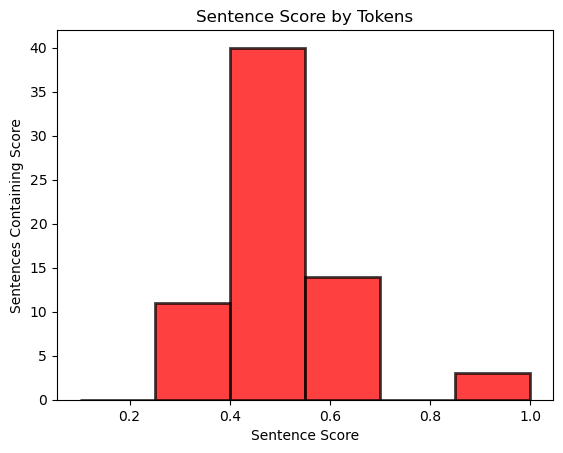

In [137]:
# Define Token Scores

def token_sentence_score(sentence, interesting_tokens):
    use_count = len([token for token in sentence])
    interesting_token = len([token.text.lower() for token in sentence if token.text.lower() in interesting_tokens])
    score = interesting_token / use_count
    return score

# Below is used to test our function. Uncomment to test function

# Test on 1 Sentence
# sentences = list(doc.sents)
# print(token_sentence_score(sentences[67], common_tokens))

# Making List Containing Scores of Sentences
token_scores = []
for sentence in list(doc.sents):
    score = token_sentence_score(sentence, common_tokens)
    token_scores.append(score)
    
# Build Histogram

plt.hist(token_scores, bins=6, range=(.1, 1), color='red', edgecolor='black', linewidth=2, alpha=.75)
plt.title('Sentence Score by Tokens')
plt.xlabel('Sentence Score')
plt.ylabel('Sentences Containing Score')
plt.show()

# Our token distribution shows that we have the highest concentration of scores lies between .4 and .6.

## 6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

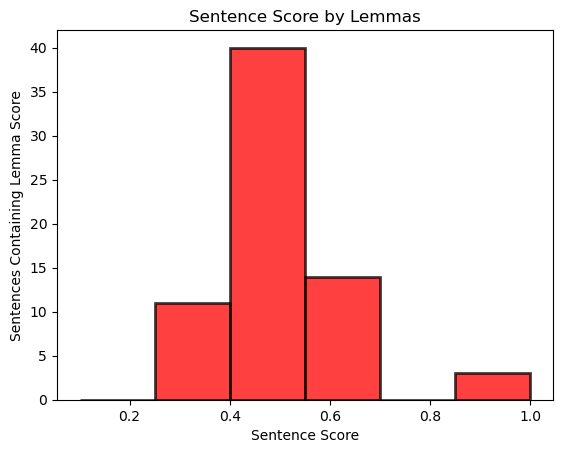

In [138]:
# Define Lemma Scores

def token_sentence_score_lemma(sentence, interesting_lemmas):
    use_count = len([word for word in sentence])
    interesting_lemma = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    score = interesting_lemma / use_count
    return score

# Below is used to test our function. Uncomment to test function

# Test on 1 Sentence
# sentences = list(doc.sents)
#  print(token_sentence_score(sentences[67], common_tokens))


# Create A List Scoring Lemmas
lemma_scores = []
for sentence in list(doc.sents):
    score = token_sentence_score_lemma(sentence, common_lemmas)
    lemma_scores.append(score)
    
# Build Histogram

plt.hist(token_scores, bins=6, range=(.1, 1), color='red', edgecolor='black', linewidth=2, alpha=.75)
plt.title('Sentence Score by Lemmas')
plt.xlabel('Sentence Score')
plt.ylabel('Sentences Containing Lemma Score')
plt.show()

# Our lemma scores are similar to our token scores. The highest concentration of use is between .4 and .6

## 7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): .6
* Cutoff Score (lemmas): .6

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [139]:
# Assuming you have token_scores and lemma_scores lists
token_scores_sorted = sorted(token_scores, reverse=True)


# Define the number of sentences in the summary
min_sentences = 6
max_sentences = 8

# Get the token score cutoff for the desired summary length
cutoff_score_tokens = token_scores_sorted[max_sentences - 1] 


print("Cutoff Score (tokens):", cutoff_score_tokens)

# Because our lemma and tokens match, we are only using the token score to determine our cutoff.
# We can see that our cutoff score (10th Sentence) matches what we put from our histogram visual.

Cutoff Score (tokens): 0.6153846153846154


## 8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [140]:
# Building the Sentence Strengths

keyword = []
stopwords = list(STOP_WORDS)
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
for token in doc:
    if token.text in stopwords or token.text in punctuation:
        continue
    if token.pos_ in pos_tag:
        keyword.append(token.text)
        
# Gathering the frequency of each word
max_freq = Counter(keyword).most_common(1)[0][1]
freq_word = Counter(keyword)
for word in freq_word.keys():
    freq_word[word] = freq_word[word] / max_freq
freq_word.most_common(5)

# Sentence Strength List
sent_strength = {}
for sent in doc.sents:
    for word in sent:
        if word.text in freq_word.keys():
            if sent in sent_strength.keys():
                sent_strength[sent] += freq_word[word.text]
            else:
                sent_strength[sent] = freq_word[word.text]

summarized_sentences = nlargest(8, sent_strength, key=sent_strength.get)
#print(summarized_sentences)

final_sentences = [w.text for w in summarized_sentences]
summary = ' '.join(final_sentences)
print(summary)

An Army recruiter chats with a potential Army recruit in the City Hall Recruiting Station in New York in December 2009.Chris Hondros / Getty Images filePrintJune 27, 2022, 8:30 AM UTCBy Courtney Kube and Molly BoigonEvery branch of the U.S. military is struggling to meet its fiscal year 2022 recruiting goals, say multiple U.S. military and defense officials, and numbers obtained by NBC News show both a record low percentage of young Americans eligible to serve and an even tinier fraction willing to consider it. The Pentagon is also looking to increase recruitment by targeting more influencers like parents, teachers and coaches, by creating recruiting stations with multiple services in them rather than service specific locations, and even moving recruiting offices to better neighborhoods, according to multiple U.S. military and defense officials. “They think they’re going to be physically or emotionally broken after serving,” said one senior U.S. military official familiar with the recr

## 9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [141]:
# Get Article Text
doc = nlp(summary)

# Sentiment Analysis
polarity = doc._.blob.polarity

print('Polarity Score:', polarity)

# Gather Sentence Count
print('''
sentences\t{num_sent}
'''.format(num_sent = len(list(doc.sents)),
          )) 


Polarity Score: 0.05847162097162097

sentences	8



## 10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [142]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define the cutoff score
cutoff_score = 0.6

# Initialize an empty list to store the sentences
sentence_list = []

# Iterate over each sentence in the article
for sent in doc.sents:
    # Calculate the score based on lemmas
    lemma_score = [token.lemma_.lower() for token in sent if not token.is_stop]
    lemma_count = len([lemma for lemma in lemma_score if lemma])  # Count non-empty lemmas
    score = len(lemma_score) / lemma_count if lemma_count > 0 else 0  # Avoid division by zero
    
    # Check if the score is greater than the cutoff score
    if score > cutoff_score:
        # Add the sentence to the list
        sentence_list.append(sent.text.strip())

# Generate the summary text
summary_lemma = ' '.join(sentence_list)

# Print the summary
print(summary_lemma)

An Army recruiter chats with a potential Army recruit in the City Hall Recruiting Station in New York in December 2009.Chris Hondros / Getty Images filePrintJune 27, 2022, 8:30 AM UTCBy Courtney Kube and Molly BoigonEvery branch of the U.S. military is struggling to meet its fiscal year 2022 recruiting goals, say multiple U.S. military and defense officials, and numbers obtained by NBC News show both a record low percentage of young Americans eligible to serve and an even tinier fraction willing to consider it. The Pentagon is also looking to increase recruitment by targeting more influencers like parents, teachers and coaches, by creating recruiting stations with multiple services in them rather than service specific locations, and even moving recruiting offices to better neighborhoods, according to multiple U.S. military and defense officials. “They think they’re going to be physically or emotionally broken after serving,” said one senior U.S. military official familiar with the recr

## 11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [143]:
from textblob import TextBlob

# Create a TextBlob object for the summary text
blob = TextBlob(summary_lemma)

# Sentiment Analysis
polarity = blob.sentiment.polarity

print('Polarity Score:', polarity)

# Reinitialize the doc object for the updated summary_lemma
doc = nlp(summary_lemma)

# Gather Sentence Count
print('''
sentences\t{num_sent}
'''.format(num_sent=len(list(doc.sents))))

Polarity Score: 0.05847162097162097

sentences	8



## 12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

#### Both of my summaries returned the same polarity score and the same number of sentences. The main reason I believe that there is a difference is because we only took the lemmas and tokens that were 0.6 or higher. Negating the lower polarities, we do not have as drastic of a swing in our sentiment. With the token and lemma summarization, we are focusing more on specific topics that may have an overall positive tone. Finally, we could be getting a selection bias from the summarization. SpaCy could inadverntatly gather the sentences that have a positive tone.

## 13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

#### Both of my summaries turned out the same. 3 of the 5 words contained in the articles are the same. With that, we are not going to expect drastic changes with our summaries. However, I thought that the summaries did a very good job of summarizing the article. The summaries do a good job of pointing out what the main issues with recruiting are (lack of qualified people, no familiarity, and common thought processes). I think that the summary does its job and gets to the overall point well. One thing that I think we miss from the summaries are a few more of the details. The main article provides a more in depth explanation of some of the topics brought up in the summary. For purposes of summarizing the article and giving a general overview, I think we did a good job and we give a reader the background of what they will see when reading the full article.

#### While this did not fully address my questions in regards to recruitment issues, it does talk about what the media is seeing. From what I have read in this article and what we are being told as active service members, this lines up well.

In [150]:
!jupyter nbconvert --execute --to html article-summarizer.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] Writing 719992 bytes to article-summarizer.html
